# **Linear Regression Training Project: Prediction of Company Profit**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from statsmodels.stats.diagnostic import linear_reset #Ramsey RESET test
from statsmodels.stats.stattools import jarque_bera # Residual Normality test
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF for multicollinearity
from statsmodels.stats.diagnostic import het_breuschpagan #BP test for heteroskedasticity

## Read file data

In [ ]:
df = pd.read_csv('/content/Ecommerce-Customers.txt')

## Preprocessing

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df = df.drop(columns=['Email','Address','Avatar' ])

In [ ]:
num_df = df.drop(columns=['Yearly Amount Spent'])
num_df

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


Spliting the data

In [ ]:
X = num_df
Y = df['Yearly Amount Spent']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

## Descriptive Statistics

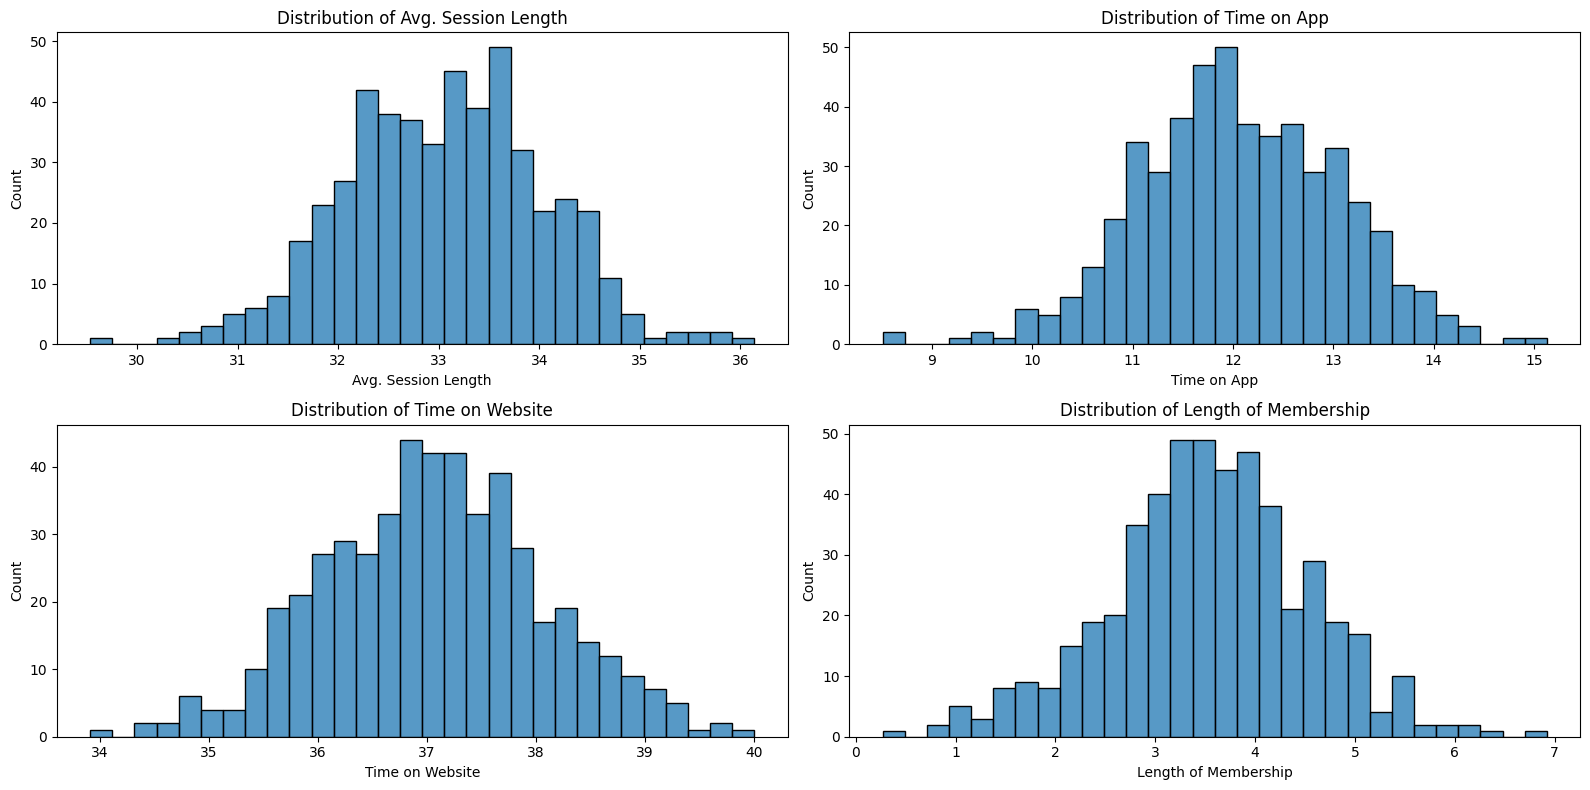

In [ ]:
# Distribution plots
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Avg. Session Length'], kde=False, bins=30)
plt.title('Distribution of Avg. Session Length')

plt.subplot(2, 2, 2)
sns.histplot(df['Time on App'], kde=False, bins=30)
plt.title('Distribution of Time on App')

plt.subplot(2, 2, 3)
sns.histplot(df['Time on Website'], kde=False, bins=30)
plt.title('Distribution of Time on Website')

plt.subplot(2, 2, 4)
sns.histplot(df['Length of Membership'], kde=False, bins=30)
plt.title('Distribution of Length of Membership')

plt.tight_layout()
plt.show()

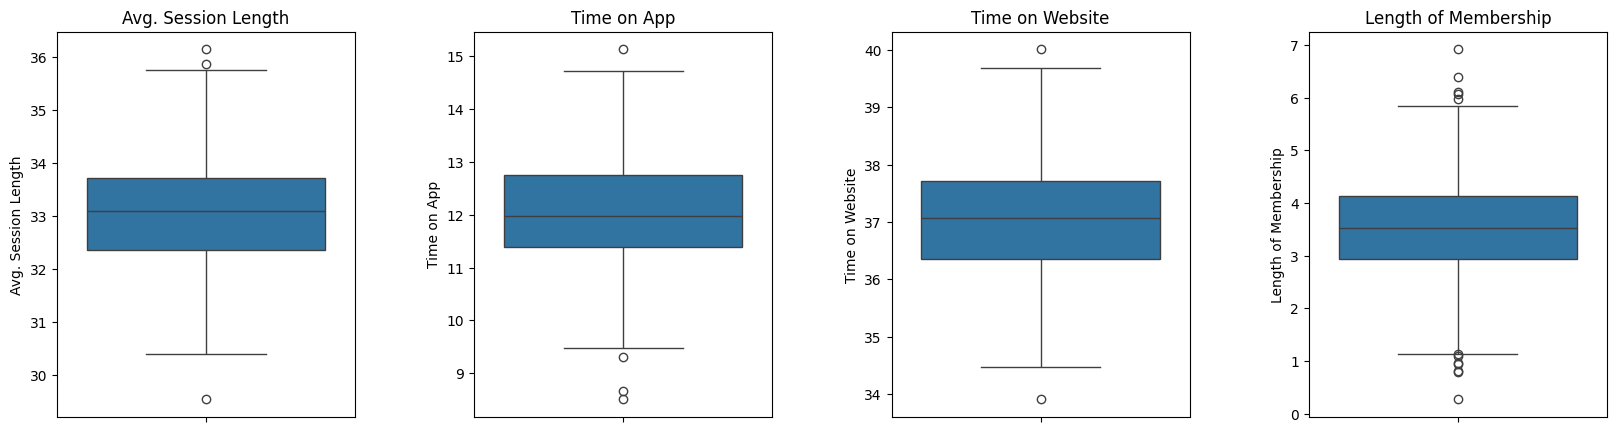

In [ ]:
#boxplot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

sns.boxplot(data=df['Avg. Session Length'], ax=axes[0])
axes[0].set_title('Avg. Session Length')

sns.boxplot(data=df['Time on App'], ax=axes[1])
axes[1].set_title('Time on App')

sns.boxplot(data=df['Time on Website'], ax=axes[2])
axes[2].set_title('Time on Website')

sns.boxplot(data=df['Length of Membership'], ax=axes[3])
axes[3].set_title('Length of Membership')

plt.subplots_adjust(wspace=0.4)

plt.show()


<Figure size 1000x600 with 0 Axes>

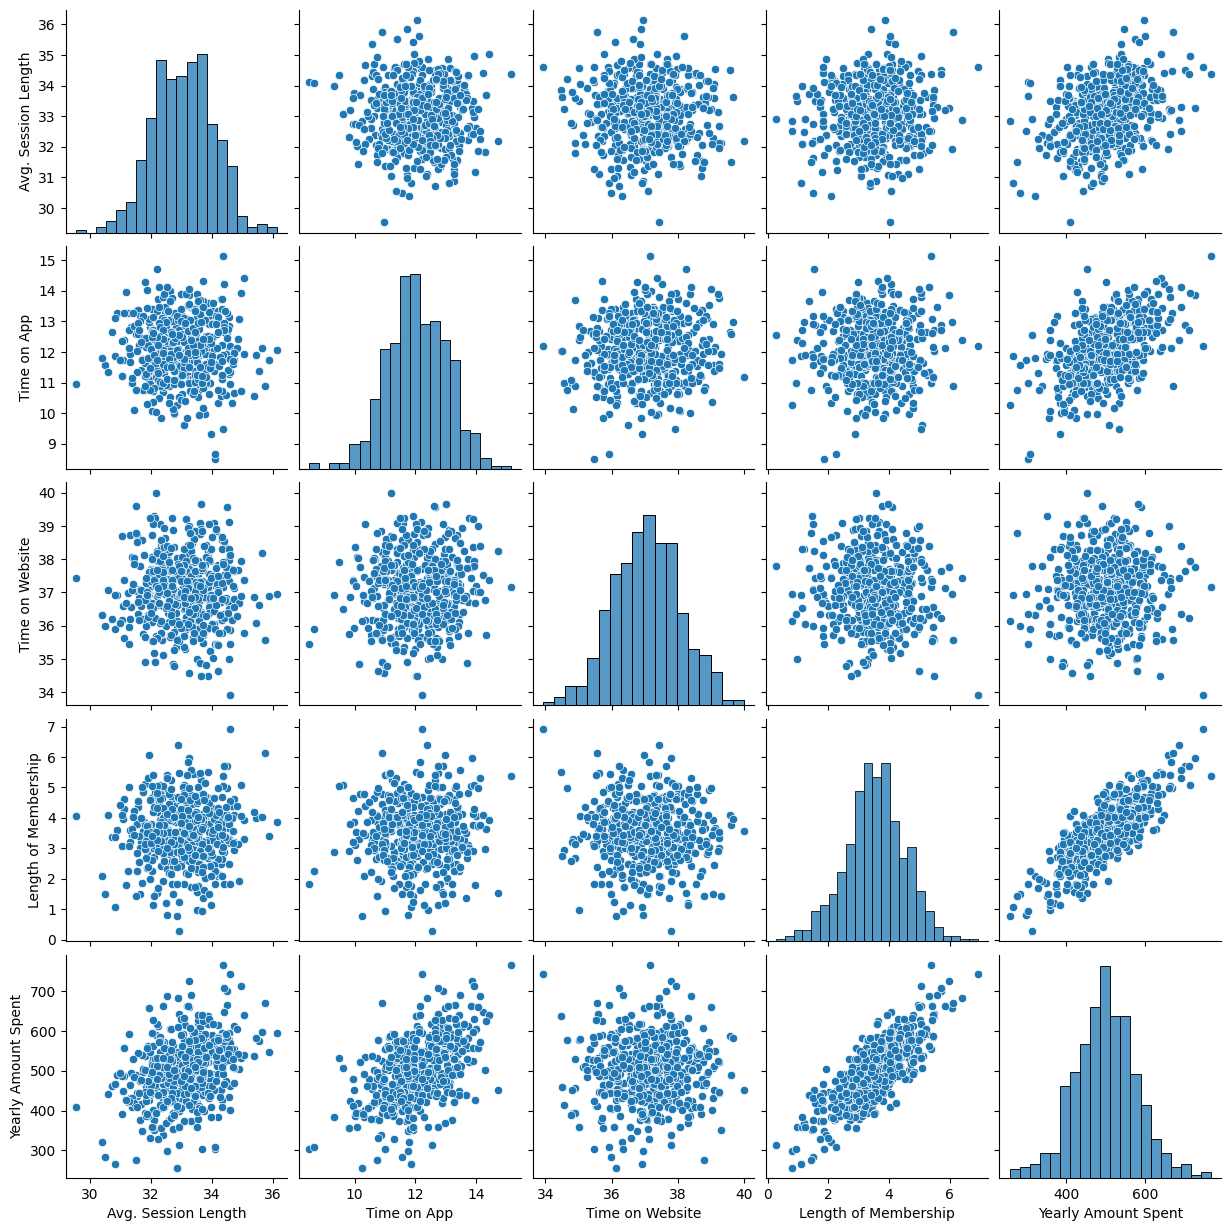

In [ ]:
#scatterplots
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.show()

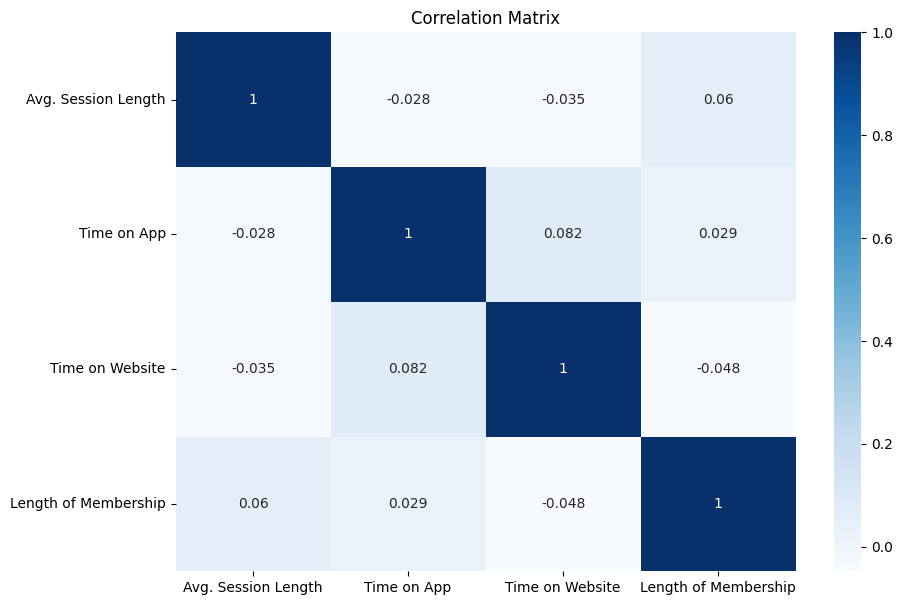

In [ ]:
# correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(data = corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Outliers

In [ ]:
# Identify outliers for "Length of Membership"
Q1 = df["Length of Membership"].quantile(0.25)
Q3 = df["Length of Membership"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_length = df[(df["Length of Membership"] < lower_bound) | (df["Length of Membership"] > upper_bound)]

# Identify outliers for "Time on App"
Q1 = df["Time on App"].quantile(0.25)
Q3 = df["Time on App"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_time = df[(df["Time on App"] < lower_bound) | (df["Time on App"] > upper_bound)]

In [ ]:
#Remove outliers
df = df[(df["Length of Membership"] >= lower_bound) & (df["Length of Membership"] <= upper_bound)]
df = df[(df["Time on App"] >= lower_bound) & (df["Time on App"] <= upper_bound)]

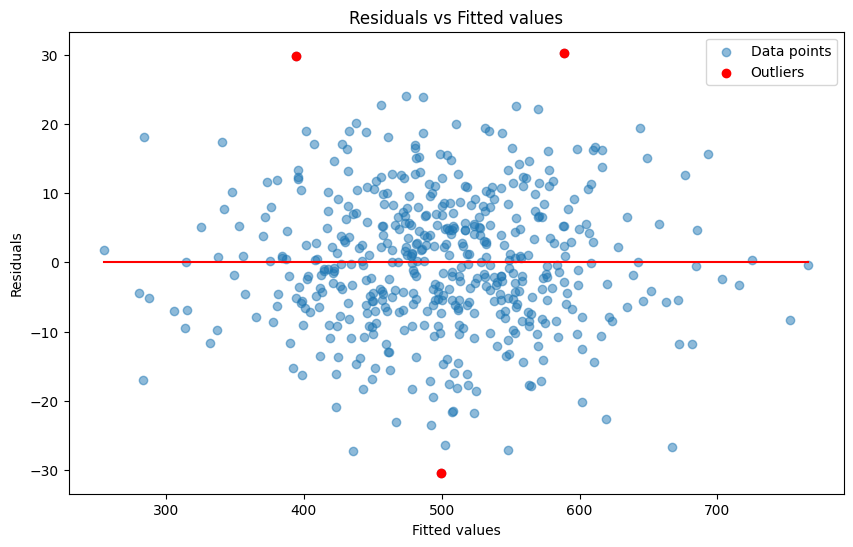

In [ ]:
# Plotting residuals versus fitted values
model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred
fitted = Y_pred

# Outlier detection
z_scores = np.abs(stats.zscore(residuals))
threshold = 3
outliers = z_scores > threshold

# Draw a plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.5, label='Data points')
plt.scatter(fitted[outliers], residuals[outliers], color='r', label='Outliers')
plt.plot([fitted.min(), fitted.max()], [0, 0], 'r-')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.legend()
plt.show()

In [ ]:
X = sm.add_constant(X_train)
model = sm.OLS(Y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     6580.
Date:                 Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                         11:32:22   Log-Likelihood:                -1677.2
No. Observations:                  450   AIC:                             3364.
Df Residuals:                      445   BIC:                             3385.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Ramsey test

The Ramsey RESET (Regression Specification Error Test) is a diagnostic test used to examine whether the linear regression model suffers from specification errors, particularly omitted variables or functional form misspecification.

In [ ]:
reset = linear_reset(model_fit, power=2, use_f = True)
print("Ramsey's RESET test F-statistic: ", reset.fvalue)
print("P-value: ", reset.pvalue)
threshold = 0.05
if reset.pvalue > threshold:
  print("No error, no omitted variable")
else:
  print("There's an error and one or many omitted variables")


Ramsey's RESET test F-statistic:  0.03559410520612565
P-value:  0.8504423706969509
No error, no omitted variable


## Normality of residuals

The normality of residuals is a diagnostic test used to assess whether the residuals (errors) of a regression model follow a normal distribution. Deviations from normality can indicate potential issues with the model's assumptions, such as misspecification or outliers.

In [ ]:
JB_pvalue =float(model_fit.summary().tables[2].data[2][3])
print("Jarque-Bera p-value:", JB_pvalue)
if JB_pvalue < 0.05:
    print("Reject the hypothesis that residual are normally distributed")
else:
    print("No evidence to reject the hypothesis that residual are normally distributed")

Jarque-Bera p-value: 0.949
No evidence to reject the hypothesis that residual are normally distributed


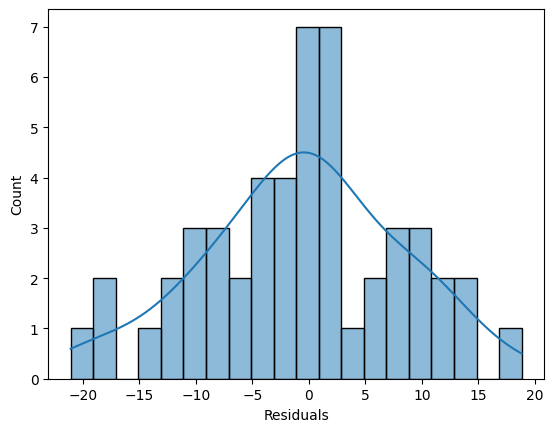

In [ ]:
test_data_prediction = model.predict(X_test)
residuals = Y_test - test_data_prediction
residuals = pd.Series(residuals, name = "Residuals")
sns.histplot(residuals, bins=20,kde=True);

## Multicolinearity

Multicollinearity refers to the phenomenon where independent variables in a regression model are highly correlated with each other, which can lead to unreliable coefficient estimates and difficulty in interpreting the model.

In this analysis, we aim to assess the presence of multicollinearity in our linear regression model and evaluate its impact on the validity of the model using VIF. The VIF measures the extent to which the variance of the estimated regression coefficients is inflated due to multicollinearity among predictor variables.

The formula to compute VIF for each variable
Where

  is the coefficient of determination of the regression model with ​
  as the dependent variable and all other independent variables as predictors.
High VIF values (typically above 10) indicate strong multicollinearity, suggesting that the variable is highly correlated with other predictors in the model.

In [ ]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = ([variance_inflation_factor(X_train.values,i) for i in range(4)])
vif = vif.sort_values(by='VIF',ascending=True)
vif

,Features,VIF
3,Length of Membership,13.913564
1,Time on App,148.810480
0,Avg. Session Length,611.318800
2,Time on Website,668.414661


From the following table, we can see a significant multicolinearity problem. Lasso Regression introduces an regularization term into the loss function. Lasso Regression can perform automatic variable selection by shrinking the coefficients of unimportant variables to near zero. This helps eliminate irrelevant variables and improves the interpretability of the model.

In [ ]:
from sklearn.linear_model import Lasso
model_2 = Lasso(alpha=1.0)
model_2.fit(X_train, Y_train)

Lasso()

model hiện tại của mình đang là model_2 nha

giò mình còn những phần này nha :
- EDA
- outlier detection
- Test các assumption 
- Testing heteroscedasticity error, WLS model
Cái này nhóm QH làm 3 cách test nhưng t nghĩ mình không nên copy cả 3
- Predict test_df - conclusion


## Heteroskedasicity


In [ ]:
X_test_with_const = sm.add_constant(X_test)
test_data_prediction_lasso = model_2.predict(X_test)
residuals_lasso = Y_test - test_data_prediction_lasso
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals_lasso, X_test_with_const)

print("Breusch-Pagan test LM statistic:", lm)
print("Breusch-Pagan test LM p-value:", lm_p_value)
print("Breusch-Pagan test F-statistic:", fvalue)
print("Breusch-Pagan test F p-value:", f_p_value)


Breusch-Pagan test LM statistic: 10.97120718330053
Breusch-Pagan test LM p-value: 0.02688951882202681
Breusch-Pagan test F-statistic: 3.1624365475972382
Breusch-Pagan test F p-value: 0.022537735629463616


In [ ]:
if lm_p_value <0.05:
    print("Homoskedasticity is violated.")
else:
    print("Homoskedasticity assumption is not violated.")

Homoskedasticity is violated.


In [ ]:
# Dự đoán giá trị y
y_pred = model_2.predict(X_test)

# Sử dụng fitted values làm trọng số trong mô hình WLS
model_wls_lasso_direct = sm.WLS(Y_test, X_test, weights=abs(y_pred))
result_wls_lasso_direct = model_wls_lasso_direct.fit()

# Kiểm tra Heteroskedasticity bằng Breusch-Pagan test
residuals_wls_lasso_direct = result_wls_lasso_direct.resid
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals_wls_lasso_direct, X_test_with_const)

print("Breusch-Pagan test LM statistic:", lm)
print("Breusch-Pagan test LM p-value:", lm_p_value)
print("Breusch-Pagan test F-statistic:", fvalue)
print("Breusch-Pagan test F p-value:", f_p_value)

if lm_p_value < 0.05:
    print("Homoskedasticity is violated.")
else:
    print("Homoskedasticity assumption is not violated.")

Breusch-Pagan test LM statistic: 4.143485319643481
Breusch-Pagan test LM p-value: 0.38693536413729407
Breusch-Pagan test F-statistic: 1.0165231738808367
Breusch-Pagan test F p-value: 0.4090322667663067
Homoskedasticity assumption is not violated.


## WLS

Using fitted values directly as weights does not help reduce heteroskedasticity.

In [ ]:
# Tính squared residuals và lấy trị tuyệt đối
temp = abs(residuals_lasso)
temp_squared = temp ** 2

# Dự đoán giá trị y
y_pred = model_2.predict(X_test)

# Regress squared residuals tuyệt đối với giá trị dự đoán y
model_abs_resid = sm.OLS(temp_squared, sm.add_constant(y_pred)).fit()

# Lấy fitted values từ mô hình OLS mới
weights_lasso_abs = model_abs_resid.fittedvalues

# Sử dụng trọng số trong mô hình WLS
model_wls_lasso_abs = sm.WLS(Y_test, X_test, weights=abs(weights_lasso_abs))
result_wls_lasso_abs = model_wls_lasso_abs.fit()

# Kiểm tra Heteroskedasticity bằng Breusch-Pagan test
residuals_wls_lasso_abs = result_wls_lasso_abs.resid
lm_abs, lm_p_value_abs, fvalue_abs, f_p_value_abs = het_breuschpagan(residuals_wls_lasso_abs, X_test_with_const)

print("Breusch-Pagan test LM statistic:", lm_abs)
print("Breusch-Pagan test LM p-value:", lm_p_value_abs)
print("Breusch-Pagan test F-statistic:", fvalue_abs)
print("Breusch-Pagan test F p-value:", f_p_value_abs)

if lm_p_value_abs < 0.05:
    print("Homoskedasticity is violated.")
else:
    print("Homoskedasticity assumption is not violated.")

Breusch-Pagan test LM statistic: 4.36921232319663
Breusch-Pagan test LM p-value: 0.35833838326714296
Breusch-Pagan test F-statistic: 1.0772033782127675
Breusch-Pagan test F p-value: 0.3790282551766583
Homoskedasticity assumption is not violated.


we calculated the squared residuals and took their absolute values to mitigate the influence of outliers. Then, we predicted the y values and regressed the absolute squared residuals on the predicted y values. By doing this, we created a new model to address heteroskedasticity. The result of the Breusch-Pagan test after using the new model showed no signs of heteroskedasticity.